In [63]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression

import math


import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.datasets 
from sklearn.linear_model import LogisticRegression


A graph of the logistic function looks like this (following code):

Text(0.5,1,' Logistic Function ')

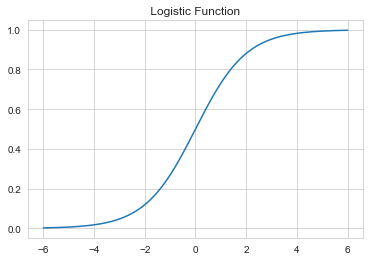

In [64]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )





# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

# Part 4: Data Visualization
Now that we've done a quick overview of some math and the data we will be working with, let's go ahead and dive into the code!

We will start with loading the data and visualizing it.

In [65]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

In [66]:
df.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273


Great! Let's go ahead and start our classfication by creating a new column called 'Had_Affair'. We will set this column equal to 0 if the affairs column is 0 (meaning no time spent in affairs) otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.



In [67]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [68]:
df.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1


In [69]:
# Create check function
def affair_check(occupation):
    if occupation >= 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['Have_ocuupation'] = df['occupation'].apply(affair_check)

In [12]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair,Have_ocuupation
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,1


In [70]:
# Create check function
def affair_check(children):
    if children <= 1:
        return 0
    else:
        return 1

# Apply to DataFrame
df['Have_children'] = df['children'].apply(affair_check)

In [71]:
df.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair,Have_ocuupation,Have_children
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,1,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,1,1


In [72]:
# Create check function
def titanic(children):
    if children <= 1:
        return 0
    else:
        return 1

# Apply to DataFrame
df['Have_children'] = df['children'].apply(titanic)

In [16]:

df.head(4)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair,Have_ocuupation,Have_children
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,1,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,1,1


Now let's go ahead and groupby the newly created 'Had_Affair' column. We'll do this by grouping by the column and then calling the mean aggregate function.



In [17]:
# Groupby Had Affair column
df.groupby('Had_Affair').mean()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Have_ocuupation,Have_children
Had_Affair,,,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000,1.0,0.383492
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243,1.0,0.554798


Looking at this brief glance of the data, it seems that the women who had affairs were slightly older,married longer, and slightly less religious and less educated. However, the mean values of both classes are very close for all variables.

Let's go ahead and try to visualize some of this data.

First some histograms.

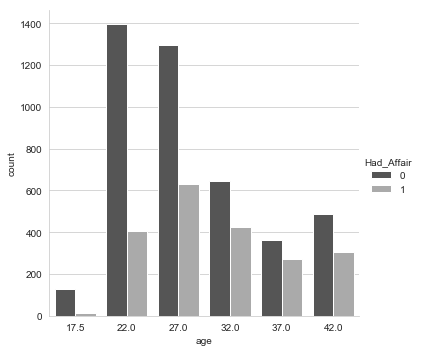

In [33]:
# Factorplot for age with Had Affair hue
sns.factorplot('age',data=df, hue='Had_Affair',palette='gray', kind='count')


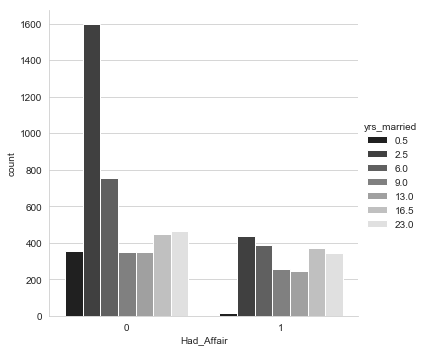

In [36]:
sns.factorplot('Had_Affair',data=df, hue='yrs_married',palette='gray', kind='count')


# Part 5: Data Preparation
If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as Categorical Variables. Basically they are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting dummy variables and creating new columns from them.

In [41]:
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

# Let's take a quick look at the results
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


Great! Now let's name the columns something a little more readable.

In [42]:
# Create column names for the new DataFrames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

# Now we will create the X and Y data sets for out logistic regression!

In [45]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [46]:
# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

Now we will concatenate all the DataFrames together.

In [47]:
# Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

# Preview of Result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,Have_ocuupation,Have_children,occ1,...,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,1,0,...,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,1,0,...,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [48]:
# Set Y as Target class, Had Affair
Y = df.Had_Affair

# Preview
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

# Part 6: Multicollinearity Consideration.
Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid multicollinearity. Multicollinearity occurs due to the dummy variables) we created. This is because the dummy variables are highly correlated, our model begins to get distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a data set point.

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.

In [49]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# Drop affairs column so Y target makes sense
X = X.drop('affairs',axis=1)

# PReview
X.head()


,rate_marriage,age,yrs_married,children,religious,educ,Have_ocuupation,Have_children,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,1,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,1,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,0,1,0,0,0,0,0,1,0,0


In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a built in method for this called ravel. Let's use it!

In [50]:
# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

# Part 7: Logistic Regression with SciKit Learn
Awesome! Now let's go ahead and run the logistic regression. This is a very similar process to the Linear Regression from the previous lecture. We'll create the model, the fit the data into the model, and check our accuracy score. Then we'll split the data into testing and training sets and see if our results improve.

Let's start by initiating the model!

In [52]:


from sklearn.linear_model import LogisticRegression

In [53]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

C:\Users\ericksen\Anaconda2anacon\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7243166823751178

Looks like we got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. This is known as checking the null error rate.



In [54]:
# Check percentage of women that had affairs
Y.mean()

0.3224945020420987

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.

Let's go ahead and check the coefficients of our model to check what seemed to be the stronger predictors.

In [55]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [56]:
coeff_df

,0,1
0,rate_marriage,[-0.7046206449150888]
1,age,[-0.05733597191843647]
2,yrs_married,[0.10167181331197199]
3,children,[-0.052505773652656816]
4,religious,[-0.370184717144437]
5,educ,[0.004930872525489069]
6,Have_ocuupation,[1.4905064780618595]
7,Have_children,[0.28408772144255184]
8,occ2,[0.17061361087404503]
9,occ3,[0.4834092132709692]


Looking at the coefficients we can see that a positive coeffecient corresponds to increasing the likelihood of having an affair while a negative coefficient means it corresponds to a decreased likelihood of having an affair as the actual data value point increases.

As you might expect, an increased marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair.

Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student).

# Part 8: Testing and Training Data Sets
Just like we did in the Linear Regression Lecture, we should be splitting our data into training and testing data sets. We'll follow a very similar procedure to the Linear Regression Lecture by using SciKit Learn's built-in train_test_split method.

In [57]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
from sklearn import metrics

In [60]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print metrics.accuracy_score(Y_test,class_predict)

0.7255025125628141


Now we have a 73.35% accuracy score, which is basically the same as our previous accuracy score, 72.58%.